Information from civilian killings in the United States by the police from January 2015 - June 2015.

Datset from [FiveThirtyEight](https://github.com/fivethirtyeight/data/tree/master/police-killings). 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [77]:
police_killings = pd.read_csv("police_killings.csv", encoding="ISO-8859-1")

In [78]:
police_killings.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


In [79]:
list(police_killings.columns)

['name',
 'age',
 'gender',
 'raceethnicity',
 'month',
 'day',
 'year',
 'streetaddress',
 'city',
 'state',
 'latitude',
 'longitude',
 'state_fp',
 'county_fp',
 'tract_ce',
 'geo_id',
 'county_id',
 'namelsad',
 'lawenforcementagency',
 'cause',
 'armed',
 'pop',
 'share_white',
 'share_black',
 'share_hispanic',
 'p_income',
 'h_income',
 'county_income',
 'comp_income',
 'county_bucket',
 'nat_bucket',
 'pov',
 'urate',
 'college']

## Focusing on the following columns:

1. name -- the name of the civilian.
2. age -- the age of the civilian.
3. gender -- the gender of the civilian.
4. raceethnicity -- the race and ethnicity of the civilian.
5. month, day, and year -- when the shooting occurred.
6. streetaddress, city, state -- where the shooting occurred.
7. lawenforcementagency -- the agency that was involved.
8. cause -- the cause of death.
9. armed -- whether or not the civilian was armed.
10. pop -- population of the census area where the incident occurred.
11. county_income -- median household income in the county.

# Killings by race

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64


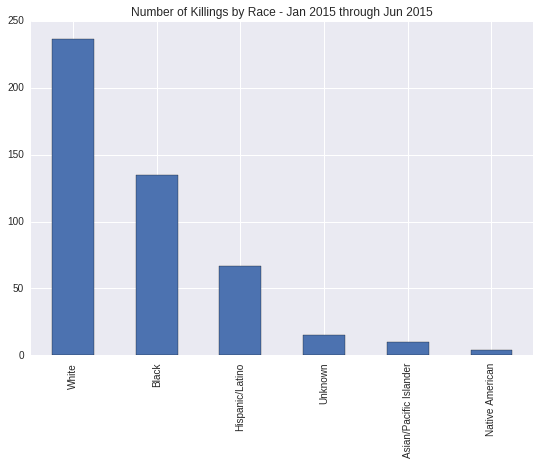

In [80]:
by_race_totals = police_killings["raceethnicity"].value_counts()
pct_race_totals = by_race_totals / by_race_totals.sum()
print(by_race_totals)
by_race_totals.plot(kind="bar", figsize = (9,6), title = "Number of Killings by Race - Jan 2015 through Jun 2015")
plt.show()

### Percentage by race

In [81]:
print(pct_race_totals * 100)

White                     50.535332
Black                     28.907923
Hispanic/Latino           14.346895
Unknown                    3.211991
Asian/Pacific Islander     2.141328
Native American            0.856531
Name: raceethnicity, dtype: float64


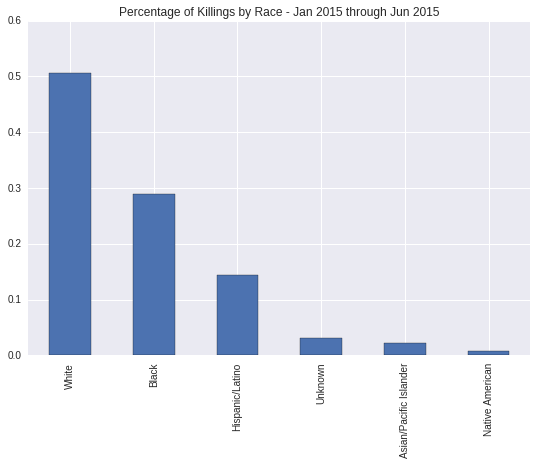

In [82]:
pct_race_totals.plot(kind="bar", figsize = (9,6), title="Percentage of Killings by Race - Jan 2015 through Jun 2015")

In [83]:
pct_race_totals = by_race_totals / by_race_totals.sum()
pct_race_totals

White                     0.505353
Black                     0.289079
Hispanic/Latino           0.143469
Unknown                   0.032120
Asian/Pacific Islander    0.021413
Native American           0.008565
Name: raceethnicity, dtype: float64

## Observations
1. Just over 50% of police killings are of white people, nearly double the second highest (black).
2. White and black people account for over 75% of the total killings over this period, Hispanic/Latino making up 14% and no significant numbers from other ethnicities.

## Follow Up Questions
1. What percentage of the total US population does each race make up? How does this compare to the percentage of police killings?
2. What effect does region have on these percentages? Take a look at geographic distribution by race.

# Killings by Regional Income

Column p_income pulls the median income from the region where the killing occured.

In [84]:
income = police_killings[police_killings["p_income"] != '-']
income = income["p_income"].astype(int)

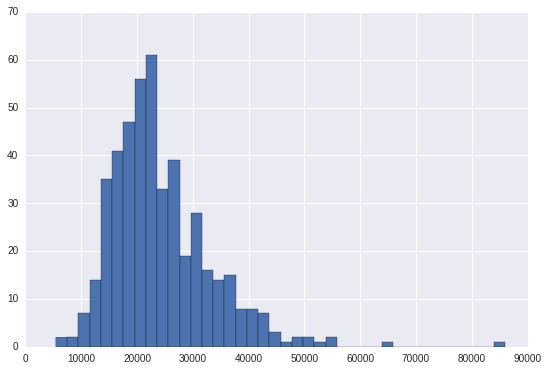

In [85]:
income.hist(bins = 40, figsize = (9,6))

## Observations
1. Most police killings occur in lower income regions. Sharp drop off at $30,000 per year.

## Follow Up Questions
1. What is the racial makeup of these areas? Create a regional map with income and race makeups. By state? County?

# Shootings by State

Gathering population data for each state, normalizing data for total state population. State level data from the [US Census Bureau](https://www.census.gov/popest/data/state/asrh/2015/SCPRC-EST2015-18+POP-RES.html).

In [86]:
state_data = pd.read_csv("state_census.csv")
state_data.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS
0,10,0,0,0,United States,321418820,247773709,77.1
1,40,3,6,1,Alabama,4858979,3755483,77.3
2,40,4,9,2,Alaska,738432,552166,74.8
3,40,4,8,4,Arizona,6828065,5205215,76.2
4,40,3,7,5,Arkansas,2978204,2272904,76.3


In [87]:
counts = police_killings["state_fp"].value_counts()
state = pd.DataFrame({"STATE": counts.index, "SHOOTINGS" : counts})
states = state_data.merge(state, on="STATE")
states["POPMILLIONS"] = states["POPESTIMATE2015"] / 1000000
states["RATE"] = states["SHOOTINGS"] / states["POPMILLIONS"]
states[["NAME", "RATE", "SHOOTINGS", "REGION", "POPMILLIONS"]].sort_values(by="RATE", ascending=False)

,NAME,RATE,SHOOTINGS,REGION,POPMILLIONS
35,Oklahoma,5.624674,22,3,3.911338
2,Arizona,3.661359,25,4,6.828065
27,Nebraska,3.164240,6,2,1.896190
11,Hawaii,2.794071,4,4,1.431603
1,Alaska,2.708442,2,4,0.738432
12,Idaho,2.417021,4,4,1.654930
31,New Mexico,2.397956,5,4,2.085109
18,Louisiana,2.355095,11,3,4.670724
5,Colorado,2.199182,12,4,5.456574
7,Delaware,2.114312,2,3,0.945934


## Observations
1. At first glance states with the highest shootings per million people (Oklahoma, Arizona, Nebraska) tend to be more rural or remote when compared to the states with the lowest rates (Connecticut, Pennsylvania, New York). Iowa breaks this pattern. Further investigation needed to find meaningful reasons for these numbers.

## Follow Up Questions
1. What is the racial and income makeup of these areas? What other factors can be considered that make these states unique and what do the highest and lowest rate states have in common?

# State by State Comparisons

## More Cleaning
Function state_convert() takes a list of state names and converts to abbreviations. DataFrames can then be joined on state abbreviations. Dropping rows with no share of ethinicity value to allow for aggregated state information. Converting ethnicity shares of county population to float.

In [88]:
import state_conv as sc
cols = ["pop", "county_income", "share_white", "share_black", "share_hispanic"]

pk = police_killings[(police_killings["share_hispanic"] != '-')]
pk = pk[(pk["share_black"] != '-')]
pk = pk[(pk["share_white"] != '-')]
pk[cols] = pk[cols].astype(float)

states["state"] = sc.state_convert(states["NAME"])
top_10_states = states[["state","RATE"]].sort_values(by = "RATE", ascending=False).head(10)
top_10_states = list(top_10_states["state"])
bot_10_states = states[["state","RATE"]].sort_values(by = "RATE").head(10)
bot_10_states = list(bot_10_states["state"])

In [89]:
pk_top_10 = pk[pk["state"].isin(top_10_states)]
pk_bot_10 = pk[pk["state"].isin(bot_10_states)]

### Summary statistics for killings in the top 10 states by rate

In [90]:
pk_top_10.describe()

/home/alexs/anaconda3/envs/python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,day,year,latitude,longitude,state_fp,county_fp,tract_ce,geo_id,county_id,pop,share_white,share_black,share_hispanic,h_income,county_income,comp_income,county_bucket,nat_bucket,urate,college
count,92.000000,92.0,92.000000,92.000000,92.000000,92.000000,92.000000,9.200000e+01,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,84.000000,92.000000,92.000000,92.000000
mean,15.630435,2015.0,35.692503,-105.901915,19.619565,46.086957,237207.445652,1.966589e+10,19665.652174,4315.750000,55.652174,11.532609,20.693478,43327.152174,48706.967391,0.899455,2.476190,2.260870,0.102894,0.222367
std,9.030738,0.0,5.941451,15.627488,14.757261,42.203237,361762.631538,1.478322e+10,14783.200649,2063.723609,24.406158,19.591303,20.415690,17537.586163,9839.206872,0.334014,1.366344,1.175478,0.060407,0.141249
min,1.000000,2015.0,19.915194,-159.642700,2.000000,1.000000,100.000000,2.020001e+09,2020.000000,403.000000,2.100000,0.000000,0.000000,15293.000000,25498.000000,0.330230,1.000000,1.000000,0.011335,0.035051
25%,7.000000,2015.0,33.349889,-111.806766,4.000000,13.000000,2450.000000,4.021002e+09,4021.000000,2886.000000,39.175000,0.675000,4.350000,32509.250000,42987.000000,0.646527,NaN,1.000000,0.061153,0.120008
50%,16.000000,2015.0,35.268585,-104.943293,16.000000,27.000000,21803.500000,1.601401e+10,16014.000000,4257.500000,58.200000,2.700000,10.850000,39825.500000,48801.000000,0.856491,NaN,2.000000,0.089227,0.190484
75%,24.000000,2015.0,38.602924,-95.993210,35.000000,72.500000,379650.000000,3.503322e+10,35032.500000,5377.000000,74.200000,11.550000,31.725000,53574.750000,53596.000000,1.079215,NaN,3.000000,0.127920,0.271616
max,30.000000,2015.0,61.218408,-75.456352,40.000000,143.000000,978400.000000,4.014301e+10,40143.000000,13561.000000,95.900000,93.100000,81.500000,111464.000000,77454.000000,2.308703,5.000000,5.000000,0.324444,0.824971


### Summary statistics for killings in the bottom 10 states by rate

In [91]:
pk_bot_10.describe()

/home/alexs/anaconda3/envs/python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,day,year,latitude,longitude,state_fp,county_fp,tract_ce,geo_id,county_id,pop,share_white,share_black,share_hispanic,h_income,county_income,comp_income,county_bucket,nat_bucket,urate,college
count,56.000000,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,54.000000,56.000000,56.000000,56.000000
mean,14.910714,2015.0,41.228598,-80.652688,33.053571,76.357143,254092.250000,3.313018e+10,33129.928571,4201.660714,60.616071,21.257143,12.948214,45497.392857,54830.839286,0.831186,2.351852,2.428571,0.126312,0.204219
std,8.657686,0.0,1.953354,7.270112,11.952055,77.343256,348169.822473,1.195056e+10,11950.692754,1428.970300,32.556947,27.770657,15.296417,21594.626616,12451.547261,0.313585,1.442710,1.291330,0.072598,0.147997
min,1.000000,2015.0,32.407139,-96.073891,9.000000,1.000000,101.000000,9.009184e+09,9009.000000,1271.000000,0.000000,0.000000,0.000000,18833.000000,34388.000000,0.329534,1.000000,1.000000,0.030341,0.026404
25%,7.000000,2015.0,40.544859,-87.882805,22.000000,26.500000,7097.500000,2.204122e+10,22040.500000,3299.250000,39.650000,2.100000,1.850000,31661.500000,46085.000000,0.613392,NaN,1.000000,0.080075,0.100815
50%,15.000000,2015.0,41.474882,-80.710449,36.000000,52.000000,40550.500000,3.606402e+10,36064.000000,4121.500000,72.950000,9.150000,6.200000,42494.000000,52930.000000,0.784233,NaN,2.000000,0.108124,0.159831
75%,22.000000,2015.0,42.274976,-73.957162,39.000000,113.000000,424800.000000,3.915353e+10,39153.000000,4928.250000,87.800000,25.125000,20.075000,58025.000000,59112.000000,1.053979,NaN,4.000000,0.166431,0.252750
max,31.000000,2015.0,46.159878,-68.100007,55.000000,467.000000,970300.000000,5.507902e+10,55079.000000,8222.000000,97.200000,98.900000,71.900000,142500.000000,87763.000000,1.677438,5.000000,5.000000,0.448075,0.744900


### Narrowing down the view
Comparing means in:
1. population
2. county income
3. share white (county)
4. share black (county)
5. share hispanic (county)

In [92]:
top_summ = pk_top_10[cols].mean()
bot_summ = pk_bot_10[cols].mean()

In [93]:
top_summ

pop                4315.750000
county_income     48706.967391
share_white          55.652174
share_black          11.532609
share_hispanic       20.693478
dtype: float64

In [94]:
bot_summ

pop                4201.660714
county_income     54830.839286
share_white          60.616071
share_black          21.257143
share_hispanic       12.948214
dtype: float64

In [95]:
summ_tots = pd.DataFrame({})
summ_tots['Top 10 States'] = top_summ
summ_tots["Bottom 10 States"] = bot_summ
print("Aggregated Means For Features - States Sorted By Rate of Police Killings")
print("")
print(summ_tots)

Aggregated Means For Features - States Sorted By Rate of Police Killings

                Top 10 States  Bottom 10 States
pop               4315.750000       4201.660714
county_income    48706.967391      54830.839286
share_white         55.652174         60.616071
share_black         11.532609         21.257143
share_hispanic      20.693478         12.948214


## Observations
1. It appears that the largest factor in common between states with high police killings is income. Race/ethnicity does not seem to play a significant part - in fact, based on preliminary observations, the states that have a higher black population seem to be at the lower rate of killings per millions in population.

2. Small dataset and county based population demographics data mean that this data is not conclusive. See follow up questions for important next steps.

3. The hispanic population seems to be higher in the states that have a higher rate of police killings. Further investigation needed as the hispanic population is only 14% of total killings.

## Follow Up Questions
1. What is the state by state population demographic data? Alternately, zoom in to the county level and expand the dataset to include at least 10 years worth of police killings information if possible.

2. In the states with the highest rate of police killings, are the killings primarily of hispanic/latino people?

# Part 2 (Coming Soon)

Map visualizations, ethinographic information by state, follow up questions answered!